# ANZ Virtual Internship (Task-2)

##Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#for decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Reading the Excel file

In [2]:
dataset=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Data Cleaning

> Removing all the irrelevant columns



In [3]:
irrelevent_cols=['status','card_present_flag','bpay_biller_code','currency',
                 'merchant_id','merchant_code','merchant_suburb','merchant_state',
                 'country','merchant_long_lat','movement','long_lat',
                 'txn_description','extraction','transaction_id']
dataset.drop(irrelevent_cols,axis=1,inplace=True)
dataset=dataset.reset_index(drop=True)

In [4]:
dataset.head()

,account,first_name,balance,date,gender,age,amount,customer_id
0,ACC-1598451071,Diana,35.39,2018-08-01,F,26,16.25,CUS-2487424745
1,ACC-1598451071,Diana,21.20,2018-08-01,F,26,14.19,CUS-2487424745
2,ACC-1222300524,Michael,5.71,2018-08-01,M,38,6.42,CUS-2142601169
3,ACC-1037050564,Rhonda,2117.22,2018-08-01,F,40,40.90,CUS-1614226872
4,ACC-1598451071,Diana,17.95,2018-08-01,F,26,3.25,CUS-2487424745


In [5]:
#check for null value present

dataset.info()
print('\nNull values\n')
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account      12043 non-null  object        
 1   first_name   12043 non-null  object        
 2   balance      12043 non-null  float64       
 3   date         12043 non-null  datetime64[ns]
 4   gender       12043 non-null  object        
 5   age          12043 non-null  int64         
 6   amount       12043 non-null  float64       
 7   customer_id  12043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 752.8+ KB

Null values



account        0
first_name     0
balance        0
date           0
gender         0
age            0
amount         0
customer_id    0
dtype: int64

##Preparing the dataset

Checking for number of customer 

In [6]:
dataset['customer_id'].nunique()

100

Preparing customer dataset

In [7]:
customer_data=[]

for cust in list(dataset['customer_id'].unique()):
    salary_txns_subset = dataset[dataset['customer_id'] == cust]
    salary_txns_subset = salary_txns_subset.reset_index(drop=True)
    account = salary_txns_subset['account'][0]
    first_name = salary_txns_subset['first_name'][0]
    gender = salary_txns_subset['gender'][0]
    age = salary_txns_subset['age'][0]
    avg_balance = round(sum(salary_txns_subset['balance']) / len(salary_txns_subset), 2)
    avg_salary = round(sum(salary_txns_subset['amount']) / len(salary_txns_subset), 2)
    row = (cust, account, first_name, gender, age,avg_balance, avg_salary, round(avg_salary*12,2))
    customer_data.append(row)
    
customer_df = pd.DataFrame(customer_data, columns = ('customer_id','account','first_name','gender',
                                                     'age','avg_balance','avg_salary','annual_salary'))
  

In [8]:
#Creating dummy variables for Gender

customer_df = pd.get_dummies(customer_df, columns = ['gender'], drop_first = True)

##Data Visualization

Text(0, 0.5, 'Annual Salary')

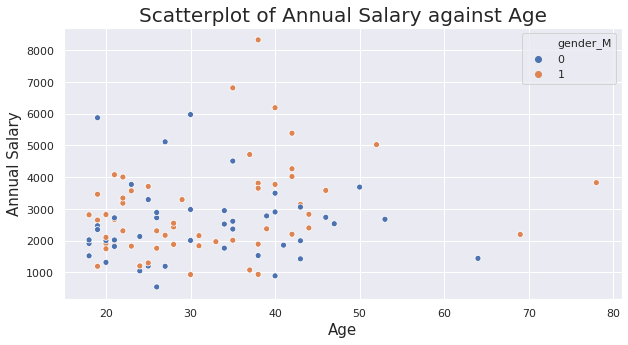

In [9]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender_M', data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

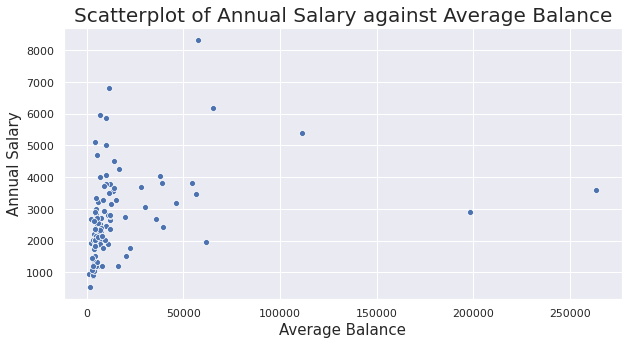

In [10]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="avg_balance", y="annual_salary", data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
age_salary_graph.set_xlabel("Average Balance", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

#Linear Regression



>Splitting Data

*   Train data 70%
*   Test data 30%





In [11]:
train, test = train_test_split(customer_df, test_size=0.3)
X = train[['age', 'avg_balance','gender_M']]
y = train['annual_salary']
X_test = test[['age', 'avg_balance','gender_M']]
y_test = test['annual_salary']

In [12]:
reg = LinearRegression()
reg.fit(X,y)

reg.score(X, y)

0.09329566612541451

>Now, we can predict the data

In [13]:
y_predict = reg.predict(X_test)

>Now Plot the data

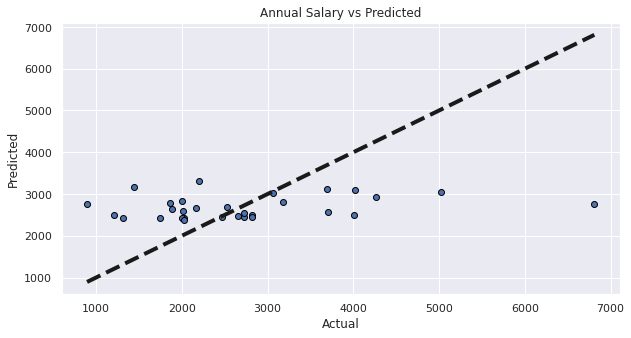

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

>Check for RMSE(Root mean squares error)

In [15]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

1178.226767879499


#Decision Tree

In [16]:
model =  DecisionTreeRegressor(max_depth=5,random_state=0)

# Fit model
model.fit(X,y)

# Print the R-squared value for the model
model.score(X, y)

0.8188969625974359

In [17]:
# Predict
y_predict_2 = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict_2)))

1415.508042259723


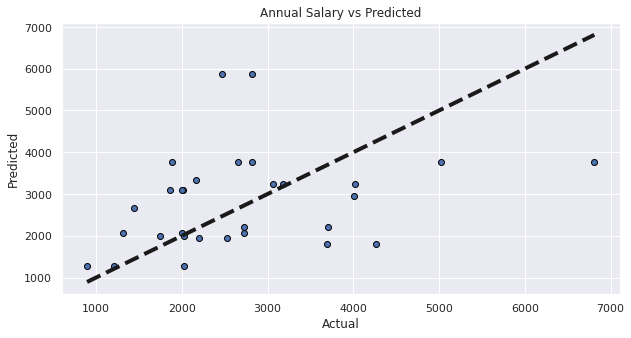

In [18]:
#Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

Conclusion,


> By observing the following data as the R-squared value is close to 0 (in both) indicates that the model has very less association with anual salary.

>Also the RMSE is high, therefore we conclude that model has very poor performance in predicting the salary

